<a href="https://colab.research.google.com/github/shinisoba/perio-dont-titis/blob/main/PERIODONTITIS_PROJECT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_excel('pdts2.xlsx',index_col=[0])
df

,tooth #,mesial length measurement,distal length measurement,Patient Diagnosis
Number,,,,
1250014R,18.0,2.5,np,Generalised Periodontitis Stage 3 Grade B
1250014R,17.0,2.1,4,NaN
1250014R,15.0,3,3.1,NaN
1250014R,14.0,2.9,3.1,NaN
1250014R,46.0,np,np,NaN
...,...,...,...,...
1249553L,38.0,1.2,np,NaN
1249553L,37.0,1.5,1.7,NaN
1249553L,36.0,1,1.9,NaN


In [ ]:
df = df.fillna(method='ffill',axis=0)
df

<ipython-input-3-d4a65862f7c4>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill',axis=0)


,tooth #,mesial length measurement,distal length measurement,Patient Diagnosis
Number,,,,
1250014R,18.0,2.5,np,Generalised Periodontitis Stage 3 Grade B
1250014R,17.0,2.1,4,Generalised Periodontitis Stage 3 Grade B
1250014R,15.0,3,3.1,Generalised Periodontitis Stage 3 Grade B
1250014R,14.0,2.9,3.1,Generalised Periodontitis Stage 3 Grade B
1250014R,46.0,np,np,Generalised Periodontitis Stage 3 Grade B
...,...,...,...,...
1249553L,38.0,1.2,np,Generalised Periodontitis Stage 1 Grade B
1249553L,37.0,1.5,1.7,Generalised Periodontitis Stage 1 Grade B
1249553L,36.0,1,1.9,Generalised Periodontitis Stage 1 Grade B


In [ ]:
df.drop('tooth #',axis=1,inplace=True)
df

,mesial length measurement,distal length measurement,Patient Diagnosis
Number,,,
1250014R,2.5,np,Generalised Periodontitis Stage 3 Grade B
1250014R,2.1,4,Generalised Periodontitis Stage 3 Grade B
1250014R,3,3.1,Generalised Periodontitis Stage 3 Grade B
1250014R,2.9,3.1,Generalised Periodontitis Stage 3 Grade B
1250014R,np,np,Generalised Periodontitis Stage 3 Grade B
...,...,...,...
1249553L,1.2,np,Generalised Periodontitis Stage 1 Grade B
1249553L,1.5,1.7,Generalised Periodontitis Stage 1 Grade B
1249553L,1,1.9,Generalised Periodontitis Stage 1 Grade B


In [ ]:
df.to_csv('pdts2.csv')

In [ ]:
df = pd.read_csv('pdts2.csv')
df

,Number,mesial length measurement,distal length measurement,Patient Diagnosis
0,1250014R,2.5,np,Generalised Periodontitis Stage 3 Grade B
1,1250014R,2.1,4,Generalised Periodontitis Stage 3 Grade B
2,1250014R,3,3.1,Generalised Periodontitis Stage 3 Grade B
3,1250014R,2.9,3.1,Generalised Periodontitis Stage 3 Grade B
4,1250014R,np,np,Generalised Periodontitis Stage 3 Grade B
...,...,...,...,...
5153,1249553L,1.2,np,Generalised Periodontitis Stage 1 Grade B
5154,1249553L,1.5,1.7,Generalised Periodontitis Stage 1 Grade B
5155,1249553L,1,1.9,Generalised Periodontitis Stage 1 Grade B
5156,1249553L,nv,2.1,Generalised Periodontitis Stage 1 Grade B


In [ ]:
# Function to process each group
def balance_group(group):
   #Replace 'np', 'nv', 'NP', 'NV' with 0 in 'mesial length measurement' and 'distal length measurement'
    group['mesial length measurement'] = group['mesial length measurement'].replace(['np', 'nv', 'NP', 'NV'], 0)
    group['distal length measurement'] = group['distal length measurement'].replace(['np', 'nv', 'NP', 'NV','.NV'], 0)

    # Sort by 'mesial length measurement' and 'distal length measurement'
    group_sorted = group.sort_values(by=['mesial length measurement', 'distal length measurement'], ascending=False)

    # If there are more than 5 rows, keep the top 5 with greatest measurements
    if len(group_sorted) > 5:
        group_sorted = group_sorted.head(5)
    # If there are less than 5 rows, add additional rows with 0 values
    elif len(group_sorted) < 5:
        num_rows_to_add = 5 - len(group_sorted)
        for _ in range(num_rows_to_add):
            new_row = pd.DataFrame({'Number': group_sorted['Number'].iloc[0],
                                    'mesial length measurement': 0,
                                    'distal length measurement': 0,
                                    'Patient Diagnosis': group_sorted['Patient Diagnosis'].iloc[0]},
                                    index=[0])
            group_sorted = pd.concat([group_sorted, new_row], ignore_index=True)

    # Set 'Patient Diagnosis' to empty (or NaN) for all rows except the first one
    group_sorted['Patient Diagnosis'].iloc[1:] = None

    return group_sorted

# Group by 'Number' and apply the balance function to each group
df_balanced = df.groupby('Number').apply(balance_group).reset_index(drop=True)

# Save the cleaned and balanced dataframe
df_balanced.to_csv('balanced_dataset.csv', index=False)

# Output the balanced dataframe
df_balanced.head()


<ipython-input-8-eddb1500ed9e>:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  group_sorted['Patient Diagnosis'].iloc[1:] = None
<ipython-input-8-eddb1500ed9e>:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!

,Number,mesial length measurement,distal length measurement,Patient Diagnosis
0,104613L,2.1,1.2,Generalised Periodontitis Stage 2 Grade B
1,104613L,1.7,2.1,None
2,104613L,1.3,1.1,None
3,104613L,1.2,0,None
4,104613L,0.8,1.1,None


In [ ]:
# Function to clean and process mesial and distal lengths
def clean_length(value):
    if isinstance(value, str):
        value = value.replace(',', '.')
        if not value.replace('.', '', 1).isdigit():
            value = '0'
    return value

# Function to concatenate mesial and distal lengths for each 'Number'
def flatten_group(group):
    mesial_list = group['mesial length measurement'].tolist()
    distal_list = group['distal length measurement'].tolist()

    # Clean mesial and distal lengths
    mesial_list = [clean_length(x) for x in mesial_list]
    distal_list = [clean_length(x) for x in distal_list]

    # Flatten into a dictionary format for easy conversion back to DataFrame
    flattened_data = {'Number': group['Number'].iloc[0]}

    for i in range(1, len(mesial_list) + 1):
        flattened_data[f'ml{i}'] = mesial_list[i-1]
        flattened_data[f'dl{i}'] = distal_list[i-1]

    # Only retain 'Patient Diagnosis' for the first row
    flattened_data['Patient Diagnosis'] = group['Patient Diagnosis'].iloc[0]

    return pd.DataFrame([flattened_data])

# Apply the flattening process group by group
df_flattened = df_balanced.groupby('Number').apply(flatten_group).reset_index(drop=True)

# Replace 'Number' column with sequential integers
df_flattened['Number'] = range(1, len(df_flattened) + 1)

# Save the cleaned and flattened dataset
df_flattened.to_csv('flattened_dataset.csv', index=False)


<ipython-input-9-0dcf264968c4>:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_flattened = df_balanced.groupby('Number').apply(flatten_group).reset_index(drop=True)


In [ ]:
df_flattened

,Number,ml1,dl1,ml2,dl2,ml3,dl3,ml4,dl4,ml5,dl5,Patient Diagnosis
0,1,2.1,1.2,1.7,2.1,1.3,1.1,1.2,0,0.8,1.1,Generalised Periodontitis Stage 2 Grade B
1,2,3.6,2.2,2.5,0,1.3,0,1.3,0,1.3,0,Generalised Periodontitis Stage 2 Grade B
2,3,1.3,1.7,1.3,0.8,1,0.9,0.9,1.3,0,0,Healthy \n ...
3,4,1.6,1.3,1.4,1.4,1.3,1,0,0,0,0,Healthy \n ...
4,5,0,2.3,0,2.3,0,2.3,0,2.3,0,2.3,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...
392,393,2.2,1.5,1.1,0,0.5,0,0.3,1.2,0,1.3,Healthy \n ...
393,394,1.7,0,1.7,0,1.7,0,1.7,0,1.7,0,Healthy \n ...
394,395,3.6,0,2.3,2.1,2.3,0.9,2,1.7,0,2.3,Healthy \n ...
395,396,1.7,0.8,1.6,0.8,1.4,1.5,1.3,0,1.2,0,Healthy


In [ ]:
data_com = df_flattened

In [ ]:
#Converting the values into Periodontitis or Healthy
#Periodontitis
maskp = data_com['Patient Diagnosis'].str.contains('periodontitis', na=False)
data_com.loc[maskp, 'Patient Diagnosis'] = 'Periodontitis'
maskP = data_com['Patient Diagnosis'].str.contains('Periodontitis', na=False)
data_com.loc[maskP, 'Patient Diagnosis'] = 'Periodontitis'
maskPG = data_com['Patient Diagnosis'].str.contains('Generalised', na=False)
data_com.loc[maskPG, 'Patient Diagnosis'] = 'Periodontitis'
maskPL = data_com['Patient Diagnosis'].str.contains('Localised', na=False)
data_com.loc[maskPL, 'Patient Diagnosis'] = 'Periodontitis'
#Healthy
maskh = data_com['Patient Diagnosis'].str.contains('gingivitis', na=False)
data_com.loc[maskh, 'Patient Diagnosis'] = 'Healthy'
maskhg = data_com['Patient Diagnosis'].str.contains('Gingivitis', na=False)
data_com.loc[maskhg, 'Patient Diagnosis'] = 'Healthy'
maskH = data_com['Patient Diagnosis'].str.contains('Healthy', na=False)
data_com.loc[maskH, 'Patient Diagnosis'] = 'Healthy'
print(data_com)

data_com.to_csv('data_com.csv', index=False)


     Number  ml1  dl1  ml2  dl2  ml3  dl3  ml4  dl4  ml5  dl5  \
0         1  2.1  1.2  1.7  2.1  1.3  1.1  1.2    0  0.8  1.1   
1         2  3.6  2.2  2.5    0  1.3    0  1.3    0  1.3    0   
2         3  1.3  1.7  1.3  0.8    1  0.9  0.9  1.3    0    0   
3         4  1.6  1.3  1.4  1.4  1.3    1    0    0    0    0   
4         5    0  2.3    0  2.3    0  2.3    0  2.3    0  2.3   
..      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
392     393  2.2  1.5  1.1    0  0.5    0  0.3  1.2    0  1.3   
393     394  1.7    0  1.7    0  1.7    0  1.7    0  1.7    0   
394     395  3.6    0  2.3  2.1  2.3  0.9    2  1.7    0  2.3   
395     396  1.7  0.8  1.6  0.8  1.4  1.5  1.3    0  1.2    0   
396     397  1.3  1.2  1.3  1.2  1.2  1.3  0.7  1.5    0  1.4   

    Patient Diagnosis  
0       Periodontitis  
1       Periodontitis  
2             Healthy  
3             Healthy  
4             Healthy  
..                ...  
392           Healthy  
393           Healthy  
394

In [ ]:
data_com['Patient Diagnosis'].value_counts()

,count
Patient Diagnosis,
Periodontitis,252
Healthy,145


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
featrs = data_com.drop('Patient Diagnosis',axis=1)
target = data_com['Patient Diagnosis']

In [ ]:
sc = MinMaxScaler()
featrs = sc.fit_transform(featrs)
enc = LabelEncoder()
target = enc.fit_transform(target)
print(featrs)
print(target)

[[0.         0.28378378 0.14634146 ... 0.         0.13793103 0.171875  ]
 [0.00252525 0.48648649 0.26829268 ... 0.         0.22413793 0.        ]
 [0.00505051 0.17567568 0.20731707 ... 0.25490196 0.         0.        ]
 ...
 [0.99494949 0.48648649 0.         ... 0.33333333 0.         0.359375  ]
 [0.99747475 0.22972973 0.09756098 ... 0.         0.20689655 0.        ]
 [1.         0.17567568 0.14634146 ... 0.29411765 0.         0.21875   ]]
[1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0
 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0
 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

encoding the new dataset for validation


In [ ]:
df_cv = pd.read_csv('data_com1.csv')
df_cv

,Number,ml1,dl1,ml2,dl2,ml3,dl3,ml4,dl4,ml5,dl5,Patient Diagnosis
0,500,3.7,2.7,3.4,4.2,0.0,5.1,0.0,2.4,0.0,0.0,Periodontitis
1,501,4.1,3.0,2.3,4.0,1.9,3.9,1.5,0.0,0.0,4.9,Periodontitis
2,502,1.1,0.0,1.1,0.0,1.1,0.0,1.1,0.0,1.1,0.0,Periodontitis
3,503,4.3,6.2,4.3,6.2,4.3,6.2,4.3,6.2,4.3,6.2,Periodontitis
4,504,3.0,3.4,2.6,2.6,2.3,0.0,2.1,2.0,2.1,0.0,Periodontitis
...,...,...,...,...,...,...,...,...,...,...,...,...
195,695,2.2,1.5,1.1,0.0,0.5,0.0,0.3,1.2,0.0,1.3,Healthy
196,696,1.7,0.0,1.7,0.0,1.7,0.0,1.7,0.0,1.7,0.0,Healthy
197,697,3.6,0.0,2.3,2.1,2.3,0.9,2.0,1.7,0.0,2.3,Healthy
198,698,1.7,0.8,1.6,0.8,1.4,1.5,1.3,0.0,1.2,0.0,Healthy


In [ ]:
featrs_v = df_cv.drop('Patient Diagnosis',axis=1)
target_v = df_cv['Patient Diagnosis']

In [ ]:
sc = MinMaxScaler()
featrs_v = sc.fit_transform(featrs_v)
enc = LabelEncoder()
target_v = enc.fit_transform(target_v)


In [ ]:
%pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42, k_neighbors=5)

In [ ]:
featrs_sm, target_sm = sm.fit_resample(featrs, target)

In [ ]:
featrs_smv, target_smv = sm.fit_resample(featrs_v,target_v)

In [ ]:
np.unique(target_sm,return_counts=True)

(array([0, 1]), array([160, 160]))

In [ ]:
from collections import Counter

# Count class distribution after SMOTE
class_counts = Counter(target_sm)

# Print class distribution
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} samples")


Class 1: 160 samples
Class 0: 160 samples


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(featrs_sm, target_sm, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(featrs_sm, target_sm, test_size=0.2, random_state=42)
X_val, y_val = featrs_smv,target_smv

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, ConfusionMatrixDisplay, classification_report


In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
rf = RandomForestClassifier()
randSearch = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)
randSearch.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bd20a187e20>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bd21552dc30>})

In [ ]:
bestRf = randSearch.best_estimator_
print('Best hyperparameters:',  randSearch.best_params_)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 51}


In [ ]:
y_pred = bestRf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9375


In [ ]:
f1 = f1_score(y_test, y_pred, average='binary')
print("F1 Score:", f1)

F1 Score: 0.9508196721311475


In [ ]:
sensitivity = recall_score(y_test, y_pred, average='binary')
print("Sensitivity (Recall):", sensitivity)

Sensitivity (Recall): 0.9354838709677419


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity)

Specificity: 0.9696969696969697


In [ ]:
classrep = classification_report(y_test, y_pred)
print("Classification Report:\n", classrep)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.97      0.94      0.95        31

    accuracy                           0.95        64
   macro avg       0.95      0.95      0.95        64
weighted avg       0.95      0.95      0.95        64



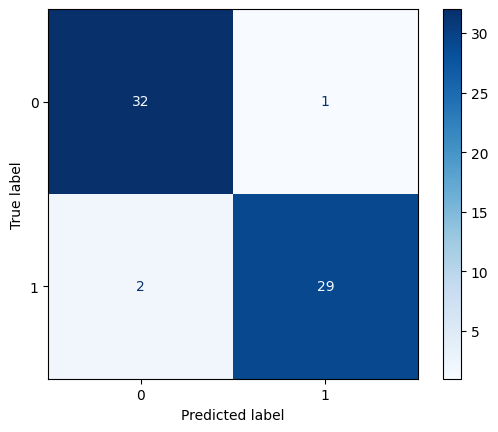

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [ ]:
#Validating the model using X_val and y_val
y_val_pred = bestRf.predict(X_val)
accuracyVal = accuracy_score(y_val, y_val_pred)
print("Validation Set Accuracy:", accuracyVal)

Validation Set Accuracy: 0.984375


In [ ]:
# Accessing the cv_results_ attribute
cv_results = randSearch.cv_results_

# Number of folds
n_splits = randSearch.cv

# Extract mean and std of the test scores
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']

# Extract the test scores for each fold
split_test_scores = [cv_results[f'split{i}_test_score'] for i in range(n_splits)]

# Displaying the results
for i, (mean_score, std_score) in enumerate(zip(mean_test_scores, std_test_scores)):
    print(f"Parameter Set {i}:")
    for j in range(n_splits):
        print(f"  Fold {j+1}: {split_test_scores[j][i]}")
    print(f"  Mean CV Accuracy: {mean_score} ± {std_score}")

Parameter Set 0:
  Fold 1: 0.9230769230769231
  Fold 2: 0.9019607843137255
  Fold 3: 0.8823529411764706
  Fold 4: 0.9215686274509803
  Fold 5: 0.9019607843137255
  Mean CV Accuracy: 0.906184012066365 ± 0.01500431989797393
Parameter Set 1:
  Fold 1: 0.8846153846153846
  Fold 2: 0.9019607843137255
  Fold 3: 0.9019607843137255
  Fold 4: 0.9215686274509803
  Fold 5: 0.8823529411764706
  Mean CV Accuracy: 0.8984917043740573 ± 0.014210034043214328
Parameter Set 2:
  Fold 1: 0.9038461538461539
  Fold 2: 0.9019607843137255
  Fold 3: 0.8823529411764706
  Fold 4: 0.9215686274509803
  Fold 5: 0.9019607843137255
  Mean CV Accuracy: 0.9023378582202112 ± 0.012423998709026291
Parameter Set 3:
  Fold 1: 0.9230769230769231
  Fold 2: 0.9019607843137255
  Fold 3: 0.8823529411764706
  Fold 4: 0.9215686274509803
  Fold 5: 0.8627450980392157
  Mean CV Accuracy: 0.8983408748114631 ± 0.023182655875524396
Parameter Set 4:
  Fold 1: 0.9230769230769231
  Fold 2: 0.9019607843137255
  Fold 3: 0.9019607843137255
  

In [ ]:
print(cv_results)

{'mean_fit_time': array([0.07102113, 0.23894224, 0.41455297, 0.31447291, 0.36991744]), 'std_fit_time': array([0.00288013, 0.00856004, 0.02399054, 0.01032875, 0.09911392]), 'mean_score_time': array([0.002671  , 0.00687337, 0.01199546, 0.00883336, 0.00982976]), 'std_score_time': array([0.00010118, 0.00021688, 0.00182707, 0.00037557, 0.0023519 ]), 'param_max_depth': masked_array(data=[8, 11, 12, 11, 7],
             mask=[False, False, False, False, False],
       fill_value=999999), 'param_n_estimators': masked_array(data=[51, 172, 290, 142, 210],
             mask=[False, False, False, False, False],
       fill_value=999999), 'params': [{'max_depth': 8, 'n_estimators': 51}, {'max_depth': 11, 'n_estimators': 172}, {'max_depth': 12, 'n_estimators': 290}, {'max_depth': 11, 'n_estimators': 142}, {'max_depth': 7, 'n_estimators': 210}], 'split0_test_score': array([0.92307692, 0.88461538, 0.90384615, 0.92307692, 0.92307692]), 'split1_test_score': array([0.90196078, 0.90196078, 0.90196078, 0.9